# Spectral Properties

In [34]:
from datetime import timedelta

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import welch
import seaborn as sns

sns.set()

In [43]:
df_dataset = pd.read_csv(f'../data/processed/method2/k20/delta_window4/processed_daysahead3_R000.csv', index_col=0)
df_dataset.index = pd.to_datetime(df_dataset.index)
df_dataset.head()

,forward_time0,Vp_pred0,Vp_obs0,sigma0,crps0,forward_time1,Vp_pred1,Vp_obs1,sigma1,crps1,...,forward_time10,Vp_pred10,Vp_obs10,sigma10,crps10,forward_time11,Vp_pred11,Vp_obs11,sigma11,crps11
current_time,,,,,,,,,,,,,,,,,,,,,
2010-01-04 12:00:00,2010-01-04 18:00:00,316.150000,280.318333,35.178180,21.641838,2010-01-05 00:00:00,326.233333,296.691667,63.669499,20.251466,...,2010-01-07 06:00:00,316.100000,293.158333,74.542648,20.215012,2010-01-07 12:00:00,309.375000,282.966667,67.963368,19.925669
2010-01-04 18:00:00,2010-01-05 00:00:00,326.233333,296.691667,33.514973,17.596749,2010-01-05 06:00:00,326.550000,287.923333,51.297621,23.072771,...,2010-01-07 12:00:00,309.375000,282.966667,65.605944,19.516243,2010-01-07 18:00:00,302.650000,283.506667,60.707602,16.575556
2010-01-05 00:00:00,2010-01-05 06:00:00,326.550000,287.923333,36.476266,23.472940,2010-01-05 12:00:00,308.800000,287.645000,66.197905,18.144465,...,2010-01-07 18:00:00,302.650000,283.506667,66.853136,17.795293,2010-01-08 00:00:00,306.100000,303.408333,58.518111,13.724773
2010-01-05 06:00:00,2010-01-05 12:00:00,308.800000,287.645000,24.155716,12.597771,2010-01-05 18:00:00,310.400000,308.595000,56.920744,13.324925,...,2010-01-08 00:00:00,306.100000,303.408333,91.129608,21.328247,2010-01-08 06:00:00,317.327273,301.767500,103.010406,25.008874
2010-01-05 12:00:00,2010-01-05 18:00:00,310.400000,308.595000,48.056284,11.257556,2010-01-06 00:00:00,316.600000,326.891667,54.884403,13.593858,...,2010-01-08 06:00:00,317.327273,301.767500,72.947354,18.366491,2010-01-08 12:00:00,328.554545,286.885000,92.912949,29.046204


In [44]:
# sampling frequency (Hz)
# infer sampling interval from the index
dt = (df_dataset.index[1] - df_dataset.index[0]).total_seconds() / timedelta(days=27).total_seconds()
fs = 1.0 / dt

# compute PSD with Welch’s method
freqs, psd = welch(df_dataset['sigma11'], fs=fs, nperseg=256)

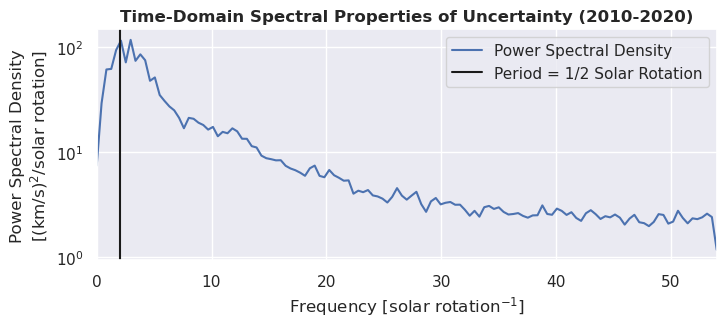

In [45]:
# plot
plt.figure(figsize=(8,3))
plt.semilogy(freqs, psd, label='Power Spectral Density')  # semilog-y is common for PSD
plt.title("Time-Domain Spectral Properties of Uncertainty (2010-2020)", fontweight='bold')
plt.xlabel("Frequency [solar rotation$^{-1}$]")
plt.ylabel("Power Spectral Density\n[(km/s)$^2$/solar rotation]")
plt.axvline(2, color='k', label='Period = 1/2 Solar Rotation')
plt.xlim(0, freqs.max())
plt.legend()
plt.savefig('../plots/spectral_properties.png', dpi=300)